<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">LAB 6.1</div><br/>
<div style="font-size: 18pt;">- Programming Multilayer perception (MLP) in Keras</div><br/><br/>

In [1]:
import keras

import numpy as np
from matplotlib import pyplot as plt
import os

2023-03-22 08:51:00.773540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.getcwd()

'/Users/nindaba/Documents/vistula/semister-5/ai/Lab-6'

# Multilayer Perceptron (MLP)

<center><img width="400" src="https://dzone.com/storage/temp/3627042-mlp-network.png"></center>
(https://dzone.com/articles/deep-learning-via-multilayer-perceptron-classifier)

# Building your first neural network in keras

In this exercise you will build MLP using **keras**.
Remember that there are three parts to implement a keras model:

- Create the computation graph (using models.Sequential)
- Compile the model
- Run the graph (using Tensorflow backend)


## Problem statement: LFW Faces
<center><img src="img/faces.png" width="50%"></center>
Labeled Faces in the Wild, a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. 
Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector. More details can be found in the technical report http://vis-www.cs.umass.edu/lfw/

**Dataset subset (min_faces_per_person=70, resize=0.4)**
- 1288 images of size 50x37

check how grey scale images are stored on a computer <br/>
https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/

In [3]:
# Download dataset
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


We have 1288 pictures (50x37 = 1850, grey scale) with faces. Let's plot picture nr 6.

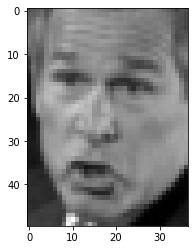

3 George W Bush


In [4]:
ind = 6
plt.imshow( lfw_people.images[ind] , cmap='gray')
plt.show()
print( lfw_people.target[ind] , lfw_people.target_names[lfw_people.target[ind]] )

In [5]:
X = lfw_people.data
y = lfw_people.target

n_features = X.shape[1]
target_names = lfw_people.target_names

In [6]:
X.shape, y.shape

((1288, 1850), (1288,))

In [7]:
50*37

1850

In [8]:
y[6], lfw_people.target_names[lfw_people.target[6]]

(3, 'George W Bush')

In [9]:
(X[6], X[6].shape) #the picture is flattened into a flat vector


(array([73.333336, 83.333336, 88.333336, ..., 25.666666, 24.333334,
        22.333334], dtype=float32),
 (1850,))

In [10]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [11]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

Convert y to one-hot coding

In [12]:
y = keras.utils.to_categorical(y)
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y.shape

(1288, 7)

In [14]:
n_classes = y.shape[1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
X_train.shape

(966, 1850)

How grey scale and color images are coded for deep learning <br/>
https://towardsdatascience.com/exploring-the-mnist-digits-dataset-7ff62631766a

In [17]:
X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test  = np.array([x.reshape((h, w, 1)) for x in X_test])

X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train.shape

(966, 50, 37, 1)

In [19]:
X_train[0]

array([[[0.04313726],
        [0.05228758],
        [0.06143791],
        ...,
        [0.77385616],
        [0.7607843 ],
        [0.7751634 ]],

       [[0.0496732 ],
        [0.05490196],
        [0.06928104],
        ...,
        [0.75555557],
        [0.73202616],
        [0.7398693 ]],

       [[0.05228758],
        [0.05098039],
        [0.07843138],
        ...,
        [0.75686276],
        [0.74771243],
        [0.7281046 ]],

       ...,

       [[0.2522876 ],
        [0.26928103],
        [0.2509804 ],
        ...,
        [0.4509804 ],
        [0.48496732],
        [0.49673203]],

       [[0.24183007],
        [0.24836601],
        [0.2509804 ],
        ...,
        [0.46928105],
        [0.4888889 ],
        [0.49673203]],

       [[0.25490198],
        [0.24183007],
        [0.23529412],
        ...,
        [0.47320262],
        [0.48104575],
        [0.5176471 ]]], dtype=float32)

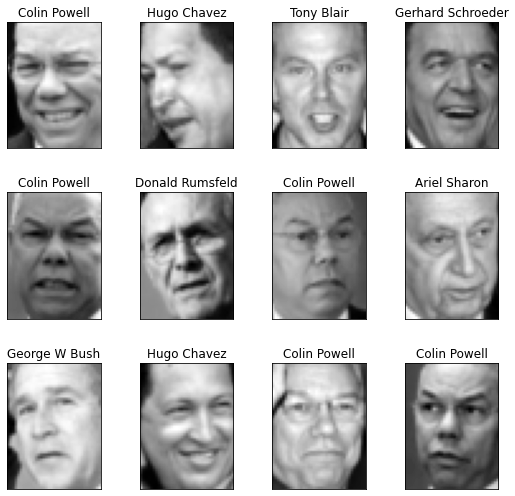

In [20]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.title(target_names[np.argmax(y_train[i])])
    plt.xticks(())
    plt.yticks(())    
plt.show()

In [21]:
(X_train.shape, y_train.shape)

((966, 50, 37, 1), (966, 7))

In [22]:
X_test.shape, y_test.shape

((322, 50, 37, 1), (322, 7))

# MLP model in keras using Dense layers


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [24]:
#Check Keras models and layers
#links in the presentation of lecture 6

In [25]:
model = Sequential()

model.add( Flatten(input_shape=(50,37,1)))
#model.add( Dense(units=1000, activation='tanh') )
#model.add( Dense(500, activation='tanh') )
#model.add( Dense(200, activation='tanh'))
model.add( Dense(100, activation='tanh'))
model.add( Dense(n_classes, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1850)              0         
                                                                 
 dense (Dense)               (None, 100)               185100    
                                                                 
 dense_1 (Dense)             (None, 7)                 707       
                                                                 
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
None


2023-03-22 08:51:06.331640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# compile the model
model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics   = ['acc'] )

In [27]:
# train
model.fit(
    x = X_train, # training_data
    y = y_train, # training_labels
    batch_size = 32, epochs = 100, verbose = 1 )

Epoch 1/100
31/31 [==============================] - 0s 848us/step - loss: 2.0837 - acc: 0.3778
Epoch 2/100
31/31 [==============================] - 0s 879us/step - loss: 1.6652 - acc: 0.4048
Epoch 3/100
31/31 [==============================] - 0s 849us/step - loss: 1.6285 - acc: 0.4306
Epoch 4/100
31/31 [==============================] - 0s 865us/step - loss: 1.5625 - acc: 0.4472
Epoch 5/100
31/31 [==============================] - 0s 926us/step - loss: 1.4875 - acc: 0.4689
Epoch 6/100
31/31 [==============================] - 0s 934us/step - loss: 1.4224 - acc: 0.4938
Epoch 7/100
31/31 [==============================] - 0s 951us/step - loss: 1.3676 - acc: 0.5072
Epoch 8/100
31/31 [==============================] - 0s 913us/step - loss: 1.2804 - acc: 0.5362
Epoch 9/100
31/31 [==============================] - 0s 892us/step - loss: 1.2097 - acc: 0.5518
Epoch 10/100
31/31 [==============================] - 0s 904us/step - loss: 1.1923 - acc: 0.5694
Epoch 11/100
31/31 [===================

31/31 [==============================] - 0s 881us/step - loss: 0.1757 - acc: 0.9648
Epoch 86/100
31/31 [==============================] - 0s 865us/step - loss: 0.2230 - acc: 0.9400
Epoch 87/100
31/31 [==============================] - 0s 830us/step - loss: 0.1752 - acc: 0.9617
Epoch 88/100
31/31 [==============================] - 0s 816us/step - loss: 0.2371 - acc: 0.9348
Epoch 89/100
31/31 [==============================] - 0s 833us/step - loss: 0.1583 - acc: 0.9689
Epoch 90/100
31/31 [==============================] - 0s 843us/step - loss: 0.1397 - acc: 0.9824
Epoch 91/100
31/31 [==============================] - 0s 852us/step - loss: 0.1451 - acc: 0.9720
Epoch 92/100
31/31 [==============================] - 0s 846us/step - loss: 0.1411 - acc: 0.9762
Epoch 93/100
31/31 [==============================] - 0s 848us/step - loss: 0.1544 - acc: 0.9700
Epoch 94/100
31/31 [==============================] - 0s 831us/step - loss: 0.1457 - acc: 0.9720
Epoch 95/100
31/31 [=======================

In [28]:
# evaluate
model.evaluate(
    x = X_test,
    y = y_test,
    batch_size = 8 , verbose = 1)

41/41 [==============================] - 0s 491us/step - loss: 0.6440 - acc: 0.8168


[0.644019603729248, 0.8167701959609985]

In [29]:
#Add more layers, change layer size, run the model again

## Exercise 1

Try classification using logistic regression <br/> 
0-layer or 1-layer NN, counting output layer as one <br/> 
Remember to flatten the inputs

In [30]:
model = Sequential()

model.add( Flatten(input_shape=(50,37,1)))
#model.add( Dense(100, activation='tanh') )
model.add( Dense(n_classes, activation='softmax'))

print(model.summary())

# compile
model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics   = ['acc'] )


# train
model.fit(
    x = X_train, # training_data
    y = y_train, # training_labels
    batch_size = 32, epochs = 100,  validation_split=0.1, verbose = 1 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1850)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 12957     
                                                                 
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 1.8149 - acc: 0.3832 - val_loss: 1.6064 - val_acc: 0.4742
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 1.6388 - acc: 0.4350 - val_loss: 1.5721 - val_acc: 0.4536
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 1.5464 - acc: 0.4453 - val_loss: 1.4803 - val_acc: 0.5361
Epoch 4/100
28/28 [=============================

Epoch 58/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4788 - acc: 0.8895 - val_loss: 0.7093 - val_acc: 0.8041
Epoch 59/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4885 - acc: 0.8734 - val_loss: 0.6954 - val_acc: 0.7938
Epoch 60/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4840 - acc: 0.8780 - val_loss: 0.6631 - val_acc: 0.8351
Epoch 61/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4959 - acc: 0.8700 - val_loss: 0.6852 - val_acc: 0.8041
Epoch 62/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4877 - acc: 0.8734 - val_loss: 0.6461 - val_acc: 0.8351
Epoch 63/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4629 - acc: 0.8884 - val_loss: 0.6863 - val_acc: 0.8247
Epoch 64/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4687 - acc: 0.8872 - val_loss: 0.6695 - val_acc: 0.8041
Epoch 65/100
28/28 [==============================] - 0s 1ms/step - loss: 0.

In [31]:
# evaluate
model.evaluate(
    x = X_test,
    y = y_test,
    batch_size = 8 , verbose = 1)

41/41 [==============================] - 0s 1ms/step - loss: 0.6039 - acc: 0.8323


[0.6039041876792908, 0.8322981595993042]

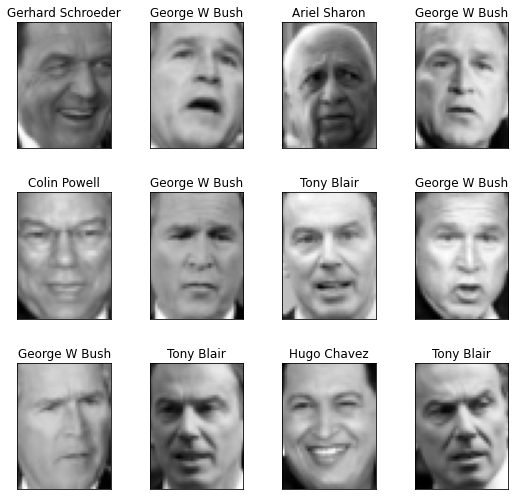

In [32]:
#plot 12 first test images
images = X_test[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.title(target_names[np.argmax(y_test[i])])
    plt.xticks(())
    plt.yticks(())    
plt.show()

In [33]:
pred = np.argmax(model.predict(X_test[0:12]), axis=-1)
target_names[pred]

1/1 [==============================] - 0s 39ms/step


array(['Gerhard Schroeder', 'George W Bush', 'Colin Powell',
       'George W Bush', 'Colin Powell', 'George W Bush', 'Tony Blair',
       'George W Bush', 'George W Bush', 'Gerhard Schroeder',
       'Hugo Chavez', 'Tony Blair'], dtype='<U17')

## Exercise 2
<br/>
Add callback `EarlyStopping`

In [34]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5, monitor="val_loss", verbose=1)


model = Sequential()

model.add( Flatten(input_shape=(50,37,1)))
model.add( Dense(100, activation='tanh') )
model.add( Dense(n_classes, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1850)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               185100    
                                                                 
 dense_4 (Dense)             (None, 7)                 707       
                                                                 
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics   = ['acc'] )


model.fit(X_train, y_train, validation_split=0.1, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test,y_test) # returns loss and metrics

Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 1.9573 - acc: 0.3510 - val_loss: 1.6096 - val_acc: 0.4536
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 1.6657 - acc: 0.3936 - val_loss: 1.7564 - val_acc: 0.2062
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 1.6759 - acc: 0.3924 - val_loss: 1.6276 - val_acc: 0.4536
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 1.6384 - acc: 0.4028 - val_loss: 1.5408 - val_acc: 0.4536
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 1.5805 - acc: 0.4223 - val_loss: 1.4949 - val_acc: 0.4536
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 1.5694 - acc: 0.4177 - val_loss: 1.4691 - val_acc: 0.5258
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 1.4913 - acc: 0.4684 - val_loss: 1.3892 - val_acc: 0.5155
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 1.4389 - a

[0.7534485459327698, 0.7670807242393494]

## Exercise 3
<br/>
Add callback `ModelCheckpoint`

In [36]:
from keras.callbacks import ModelCheckpoint
take_best_model = ModelCheckpoint("my_model.h5py", save_best_only=True, verbose=1)

Repeat exercise 2 but do evaluation using best model (for lowest validation loss epoch)

In [37]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5, monitor="val_loss", verbose=1)


model = Sequential()

model.add( Flatten(input_shape=(50,37,1)))
model.add( Dense(100, activation='tanh') )
model.add( Dense(n_classes, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1850)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               185100    
                                                                 
 dense_6 (Dense)             (None, 7)                 707       
                                                                 
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics   = ['acc'] )


model.fit(X_train, y_train, validation_split=0.1, epochs=100, callbacks=[early_stopping, take_best_model])

Epoch 1/100
 1/28 [>.............................] - ETA: 3s - loss: 2.1130 - acc: 0.0625
Epoch 1: val_loss improved from inf to 1.67900, saving model to my_model.h5py
INFO:tensorflow:Assets written to: my_model.h5py/assets
28/28 [==============================] - 1s 14ms/step - loss: 2.0652 - acc: 0.3786 - val_loss: 1.6790 - val_acc: 0.4536
Epoch 2/100
 1/28 [>.............................] - ETA: 0s - loss: 1.6240 - acc: 0.4062
Epoch 2: val_loss improved from 1.67900 to 1.66492, saving model to my_model.h5py
INFO:tensorflow:Assets written to: my_model.h5py/assets
28/28 [==============================] - 0s 11ms/step - loss: 1.6531 - acc: 0.4177 - val_loss: 1.6649 - val_acc: 0.4845
Epoch 3/100
 1/28 [>.............................] - ETA: 0s - loss: 1.8886 - acc: 0.3438
Epoch 3: val_loss improved from 1.66492 to 1.55231, saving model to my_model.h5py
INFO:tensorflow:Assets written to: my_model.h5py/assets
28/28 [==============================] - 0s 8ms/step - loss: 1.6212 - acc: 0.449

28/28 [==============================] - 0s 1ms/step - loss: 0.6526 - acc: 0.8078 - val_loss: 0.8698 - val_acc: 0.7113
Epoch 27/100
 1/28 [>.............................] - ETA: 0s - loss: 0.7982 - acc: 0.7188
Epoch 27: val_loss did not improve from 0.82224
28/28 [==============================] - 0s 1ms/step - loss: 0.6290 - acc: 0.8308 - val_loss: 0.8946 - val_acc: 0.6495
Epoch 28/100
 1/28 [>.............................] - ETA: 0s - loss: 0.7242 - acc: 0.6875
Epoch 28: val_loss improved from 0.82224 to 0.75595, saving model to my_model.h5py
INFO:tensorflow:Assets written to: my_model.h5py/assets
28/28 [==============================] - 0s 9ms/step - loss: 0.6231 - acc: 0.8216 - val_loss: 0.7559 - val_acc: 0.8041
Epoch 29/100
 1/28 [>.............................] - ETA: 0s - loss: 0.6202 - acc: 0.8750
Epoch 29: val_loss improved from 0.75595 to 0.71785, saving model to my_model.h5py
INFO:tensorflow:Assets written to: my_model.h5py/assets
28/28 [==============================] - 0s 

In [39]:
model.evaluate(X_test,y_test) # returns loss and metrics

11/11 [==============================] - 0s 674us/step - loss: 0.6978 - acc: 0.8043


[0.6977956295013428, 0.804347813129425]

In [41]:
#load best model
model_best = keras.models.load_model("my_model.h5py")

In [42]:
model_best.evaluate(X_test,y_test) # returns loss and metrics

11/11 [==============================] - 0s 949us/step - loss: 0.6324 - acc: 0.8416


[0.6323688626289368, 0.8416149020195007]